In [1]:
import sys
import os
sys.path.append(os.path.abspath("Pytorch/"))
sys.path.append(os.path.abspath("models/"))

In [2]:
from UncorrelatedFBSNNs import *
from CallOptionsBasket import *

In [3]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import time

M = 128  # number of trajectories (batch size)
N = 200  # number of time snapshots
D = 100 # number of dimensions
Mm = N ** (1/5)

layers = [D + 1] + 4 * [256] + [1]

Xi = np.array([1] * int(D))[None, :]
T = 1.0

"Available architectures"
mode = "NAIS-Net"  # FC, Resnet and NAIS-Net are available
activation = "Sine"  # Sine and ReLU are available
model = CallOptionsBasket(Xi, T, M, N, D, Mm, layers, mode, activation)

n_iter = 5 * 10**3
lr = 1e-5

In [4]:
model.load_model("models/100DCallOption.pth")

In [5]:
tot = time.time()
print(model.device)
graph = model.train(n_iter, lr)
print("total time:", time.time() - tot, "s")

cuda:0
It: 34600, Loss: 1.675e+02, Y0: 5.088, Time: 1.13, Learning Rate: 1.000e-05
It: 34700, Loss: 2.214e+02, Y0: 5.086, Time: 68.23, Learning Rate: 1.000e-05
It: 34800, Loss: 2.041e+02, Y0: 5.049, Time: 69.03, Learning Rate: 1.000e-05
It: 34900, Loss: 1.692e+02, Y0: 5.066, Time: 68.63, Learning Rate: 1.000e-05
It: 35000, Loss: 2.079e+02, Y0: 5.068, Time: 68.98, Learning Rate: 1.000e-05
It: 35100, Loss: 1.852e+02, Y0: 5.053, Time: 69.02, Learning Rate: 1.000e-05
It: 35200, Loss: 2.417e+02, Y0: 5.063, Time: 68.79, Learning Rate: 1.000e-05
It: 35300, Loss: 1.904e+02, Y0: 5.078, Time: 68.94, Learning Rate: 1.000e-05
It: 35400, Loss: 1.755e+02, Y0: 5.056, Time: 68.94, Learning Rate: 1.000e-05
It: 35500, Loss: 2.266e+02, Y0: 5.059, Time: 69.08, Learning Rate: 1.000e-05
It: 35600, Loss: 1.783e+02, Y0: 5.052, Time: 69.36, Learning Rate: 1.000e-05
It: 35700, Loss: 1.869e+02, Y0: 5.049, Time: 69.46, Learning Rate: 1.000e-05
It: 35800, Loss: 2.128e+02, Y0: 5.062, Time: 68.72, Learning Rate: 1.0

In [6]:
t_test, W_test = model.fetch_minibatch()
X_pred, Y_pred = model.predict(Xi, t_test, W_test)

if type(t_test).__module__ != 'numpy':
    t_test = t_test.cpu().numpy()
if type(X_pred).__module__ != 'numpy':
    X_pred = X_pred.cpu().detach().numpy()
if type(Y_pred).__module__ != 'numpy':
    Y_pred = Y_pred.cpu().detach().numpy()

for i in range(63):
    t_test_i, W_test_i = model.fetch_minibatch()
    X_pred_i, Y_pred_i = model.predict(Xi, t_test_i, W_test_i)
    if type(X_pred_i).__module__ != 'numpy':
        X_pred_i = X_pred_i.cpu().detach().numpy()
    if type(Y_pred_i).__module__ != 'numpy':
        Y_pred_i = Y_pred_i.cpu().detach().numpy()
    X_pred = np.concatenate((X_pred, X_pred_i), axis=0)
    Y_pred = np.concatenate((Y_pred, Y_pred_i), axis=0)


In [7]:
graph = model.iteration, model.training_loss

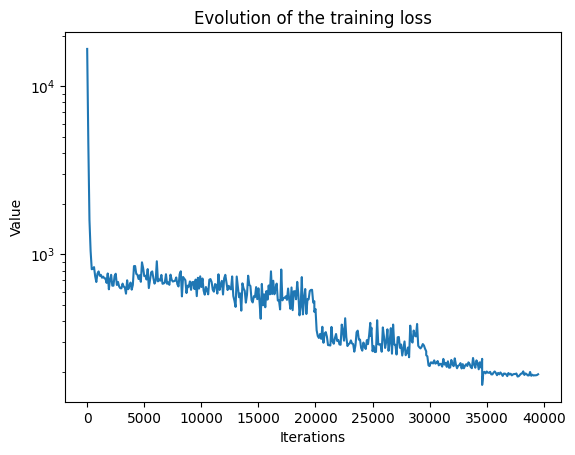

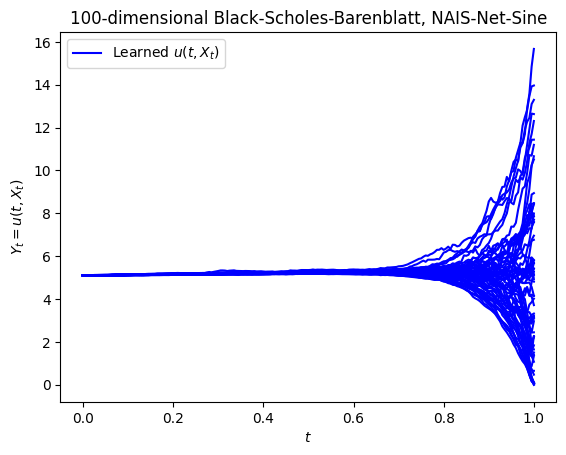

In [8]:
plt.figure()
plt.plot(graph[0], graph[1])
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.yscale("log")
plt.title('Evolution of the training loss')
samples = 64

plt.figure()
plt.plot(t_test[0:1, :, 0].T, Y_pred[0:1, :, 0].T, 'b', label='Learned $u(t,X_t)$')


plt.plot(t_test[1:samples, :, 0].T, Y_pred[1:samples, :, 0].T, 'b')

plt.xlabel('$t$')
plt.ylabel('$Y_t = u(t,X_t)$')
plt.title(str(D) + '-dimensional Black-Scholes-Barenblatt, ' + model.mode + "-" + model.activation)
plt.legend()

plt.show()

In [9]:
Y_pred.shape

(8192, 201, 1)

In [10]:
Y_preds = Y_pred.reshape(8192, 201)

In [11]:
time_stamps = t_test[0].reshape(201,)
time_stamps

array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
       0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
       0.09 , 0.095, 0.1  , 0.105, 0.11 , 0.115, 0.12 , 0.125, 0.13 ,
       0.135, 0.14 , 0.145, 0.15 , 0.155, 0.16 , 0.165, 0.17 , 0.175,
       0.18 , 0.185, 0.19 , 0.195, 0.2  , 0.205, 0.21 , 0.215, 0.22 ,
       0.225, 0.23 , 0.235, 0.24 , 0.245, 0.25 , 0.255, 0.26 , 0.265,
       0.27 , 0.275, 0.28 , 0.285, 0.29 , 0.295, 0.3  , 0.305, 0.31 ,
       0.315, 0.32 , 0.325, 0.33 , 0.335, 0.34 , 0.345, 0.35 , 0.355,
       0.36 , 0.365, 0.37 , 0.375, 0.38 , 0.385, 0.39 , 0.395, 0.4  ,
       0.405, 0.41 , 0.415, 0.42 , 0.425, 0.43 , 0.435, 0.44 , 0.445,
       0.45 , 0.455, 0.46 , 0.465, 0.47 , 0.475, 0.48 , 0.485, 0.49 ,
       0.495, 0.5  , 0.505, 0.51 , 0.515, 0.52 , 0.525, 0.53 , 0.535,
       0.54 , 0.545, 0.55 , 0.555, 0.56 , 0.565, 0.57 , 0.575, 0.58 ,
       0.585, 0.59 , 0.595, 0.6  , 0.605, 0.61 , 0.615, 0.62 , 0.625,
       0.63 , 0.635,

In [12]:
r = 0.05

In [13]:
epe = np.mean(np.exp(-r*time_stamps) * np.maximum(Y_preds,0),axis=0)    
epe

array([5.094919 , 5.0962434, 5.0973673, 5.0981264, 5.098593 , 5.098803 ,
       5.0987983, 5.0986238, 5.0983543, 5.0980883, 5.0978575, 5.0976787,
       5.097724 , 5.0978756, 5.0981464, 5.0986247, 5.0991735, 5.099774 ,
       5.1003103, 5.100699 , 5.1009836, 5.101114 , 5.101042 , 5.1008554,
       5.100623 , 5.1003246, 5.1000714, 5.0998135, 5.0996103, 5.0995407,
       5.0995045, 5.0996127, 5.0997534, 5.099934 , 5.100111 , 5.100319 ,
       5.100618 , 5.1008134, 5.1009364, 5.1010375, 5.101065 , 5.1009693,
       5.100802 , 5.100522 , 5.1001406, 5.0997505, 5.0993357, 5.0989594,
       5.098516 , 5.098154 , 5.0978947, 5.097738 , 5.097645 , 5.097763 ,
       5.097899 , 5.0981226, 5.098384 , 5.0987153, 5.0991173, 5.0995116,
       5.0999274, 5.10037  , 5.100734 , 5.1010118, 5.1011815, 5.1013193,
       5.101318 , 5.101256 , 5.1010375, 5.1008162, 5.1006007, 5.100362 ,
       5.1001334, 5.0999603, 5.099895 , 5.09991  , 5.09997  , 5.1000395,
       5.100247 , 5.1004667, 5.100706 , 5.1008897, 

In [14]:
ene = np.mean(np.exp(-r*time_stamps) * np.minimum(Y_preds,0),axis=0)    
ene

array([ 0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
        0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
        0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
        0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
        0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
        0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
        0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
        0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
        0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
        0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
        0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
        0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
        0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
        0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
        0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e

In [20]:
from scipy.stats import multivariate_normal as normal
dw_sample = normal.rvs(size=[40000, D, N]) * np.sqrt(T/N)
x_sample = np.zeros([40000, D, N + 1]) 
x_sample[:, :, 0] = np.ones([40000, D]) * 1
factor = np.exp((0.05-(0.4**2)/2)*(T/N))
for i in range(N):   
    x_sample[:, :, i + 1] = (factor * np.exp(0.4 * dw_sample[:, :, i])) * x_sample[:, :, i]

In [21]:
portfolio = np.sum(x_sample, axis=1, keepdims=True)
payoff = np.maximum(portfolio - 100 * 1, 0)
average = np.mean(payoff, axis=0, keepdims=True)
mc_price = np.exp(-0.05 * 1) * average[:, :, 200]

In [22]:
mc_price

array([[5.09793812]])

In [23]:
epe_exact = np.array([mc_price[0][0] for _ in time_stamps])
ene_exact = np.array([0.0 for _ in time_stamps])

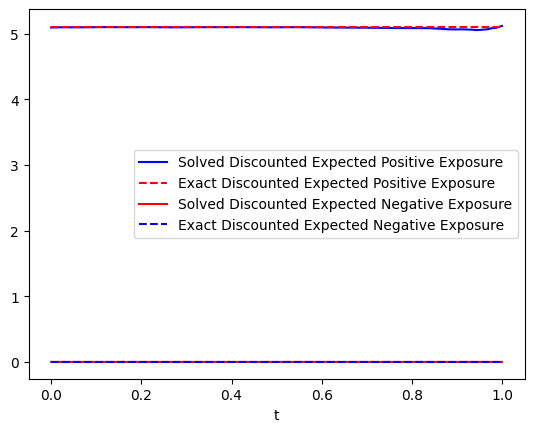

In [24]:
fig = plt.figure()
plt.plot(time_stamps,np.transpose(epe),'b',label='Solved Discounted Expected Positive Exposure' )
plt.plot(time_stamps,epe_exact,'r--',label='Exact Discounted Expected Positive Exposure')
plt.plot(time_stamps,np.transpose(ene),'r',label='Solved Discounted Expected Negative Exposure')
plt.plot(time_stamps,ene_exact,'b--',label='Exact Discounted Expected Negative Exposure')

plt.xlabel('t')
plt.legend()

plt.show()

In [28]:
np.mean((epe_exact - epe)**2)

0.00014783545499332012

In [25]:
model.save_model("models/100DCallOption.pth")